# HOUSE PRICE PREDICTION USING MACHINE LEARNING
####  Predictive Model [Supervised Learning]

## Problem Statement
**House Price Prediction (Regression)**

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a trusted way to monitor the asset is incredibly important. Hence, they hire consultant's like us to help them give insights and develop a model to accurately predict their real estate prices.

Based on the train dataset, we are required to develop a model that accurately predicts the real estate prices.

## DataSet Description:  
 
#### House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others

#### Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        
#### House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


## Loading the DataSet

In [1]:
import pandas as pd
import numpy as np

# '%matplotlib inline' to display histograms and the barplots to display inline with jupyter notebook 
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn for scatterplot and the striplot 
import seaborn as sbn

In [2]:
df = pd.read_csv("chennai_house_price_prediction.csv")
df.shape
#size of the dataset 'rows: 7109' ans 'columns: 19'

(7109, 19)

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


## Data Exploration

### Describe function

In [4]:
df.describe()
# describes the continuous variable based on the count, mean, standard deviation, minimum to maximum [25%, 50%, 75%]

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


- The number of missing values can be determined by the count of each continuous variables.
- Comparing the 75% and the max value, determines the presence of outliers in the dataset.

In [5]:
df.describe(include='all')
# using describe with the attribute include with 'all' as a parameter can describe the categorical variables too

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P06236,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


- Using the 'include='all'' argument can give out the unique values present in the categorical variables.

### Isnull function

In [6]:
df.isnull()
# isnull() is to determine the number of missing values

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- The problem that lies with isnull() is that it returns the boolean values for every record and it's corelated variable. 

In [7]:
df.isnull().sum()
# using sum() will sum-up the number of missing values  

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

- **<dataframe>.isnull().sum()** will give the number of missing values in continuous and the cactegorical variables combined.

### Data types

In [8]:
df.dtypes
# displays the datatype associated with concerned datatype

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

How are we actually going to classify the **'categorical'** and **'continuous'** variable?
 - The variables with type **'object'** are **categorical** variables.
 - And the ones with **'int64'** and **'float64'** are **continuous** variables.

In [9]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()
# upfront the temporary dataset has been created with 'columns: 3' and 'rows: 19' with information for every record like the datatypes, null_count and their corresponding unique count.  

In [10]:
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


### Value Counts

In [11]:
# number of bedrooms

df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

- It has four different categories
- This variable should be object and not integer

In [12]:
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

- About 53% houses have one bedroom
- 33% have 2 bedrooms
- Less than 10% houses have 3 bedrooms 
- Only 3.5% have 4 bedrooms

In [13]:
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

- The 'Rooms' might have number of kitchen, hall, dinning area etc.
- No house with 1 room, and a very few that have 2

In [14]:
df['N_BATHROOM'].value_counts()/len(df)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

- 78% houses have 1 bathroom and 21% have 2 bathrooms
- The same can be represented using bar plots

In [15]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

- There are only two unique categories
- The number of houses with parking facility in both the cases is almost the same

## UNIVARIATE ENUMERATIVE ANALYSIS

### Scatter plots

<AxesSubplot:ylabel='SALES_PRICE'>

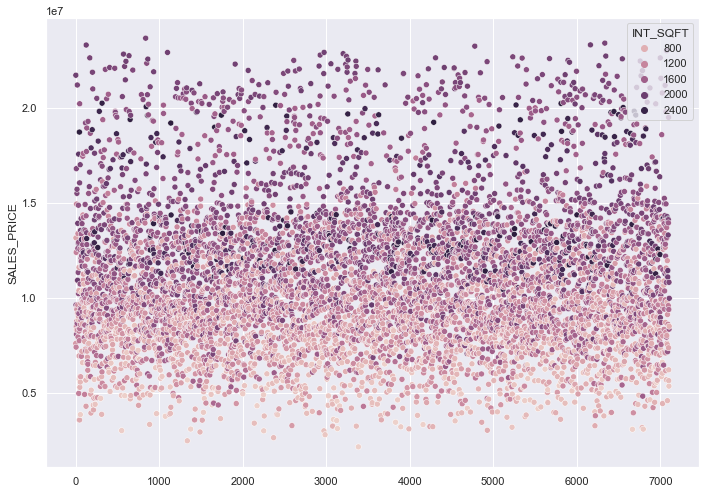

In [16]:
## Seaborn scatter plot for the interior sqft and the sales price of the house.

sbn.set(rc={'figure.figsize':(11.7,8.27)})
sbn.scatterplot(x=df.index,y=df['SALES_PRICE'],hue=df['INT_SQFT'])


<AxesSubplot:ylabel='SALES_PRICE'>

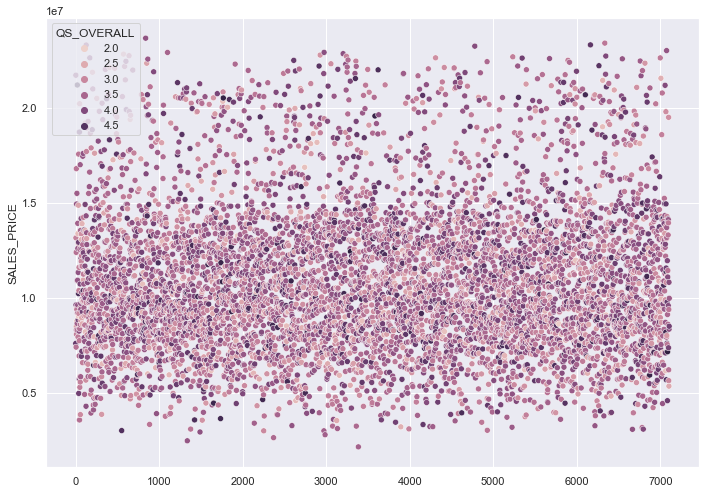

In [17]:
sbn.set(rc={'figure.figsize':(11.7,8.27)})
sbn.scatterplot(x=df.index,y=df['SALES_PRICE'],hue=df['QS_OVERALL'])

<AxesSubplot:ylabel='SALES_PRICE'>

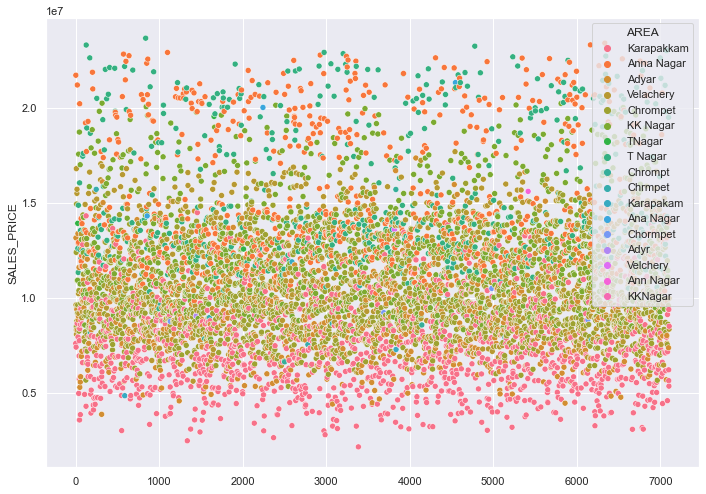

In [18]:
sbn.set(rc={'figure.figsize':(11.7,8.27)})
sbn.scatterplot(x=df.index,y=df['SALES_PRICE'],hue=df['AREA'])

### Strip Plots

<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE'>

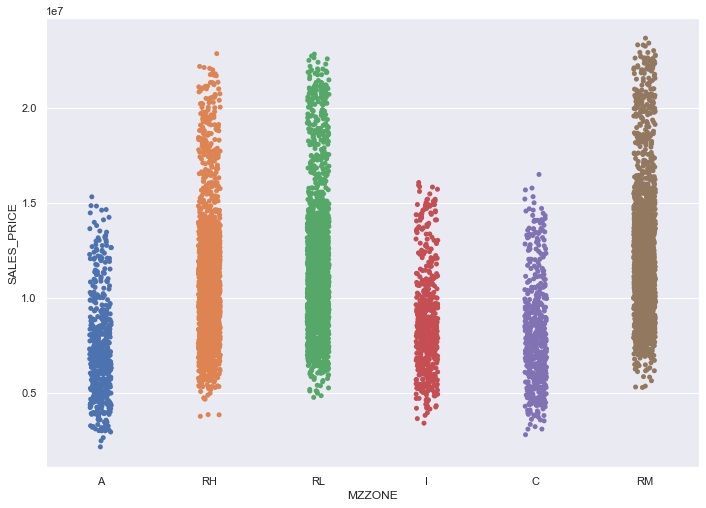

In [19]:
sbn.set(rc={'figure.figsize':(11.7,8.27)})
sbn.stripplot(x=df['MZZONE'],y=df['SALES_PRICE'])

<AxesSubplot:xlabel='SALES_PRICE', ylabel='SALE_COND'>

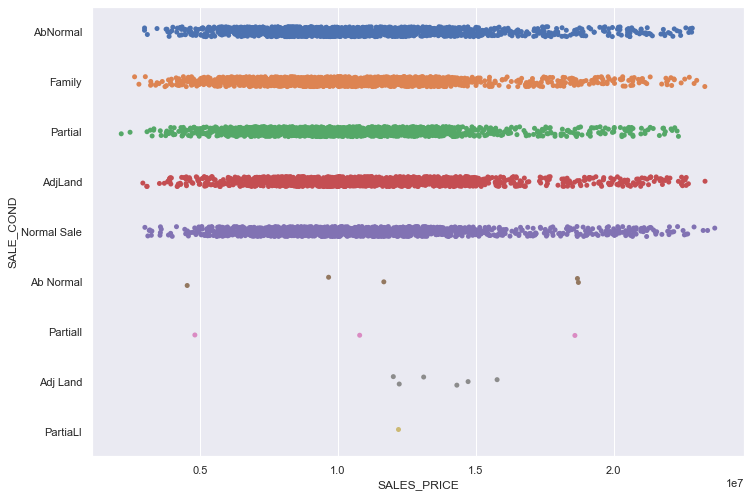

In [20]:
sbn.set(rc={'figure.figsize':(11.7,8.27)})
sbn.stripplot(x=df['SALES_PRICE'],y=df['SALE_COND'])

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

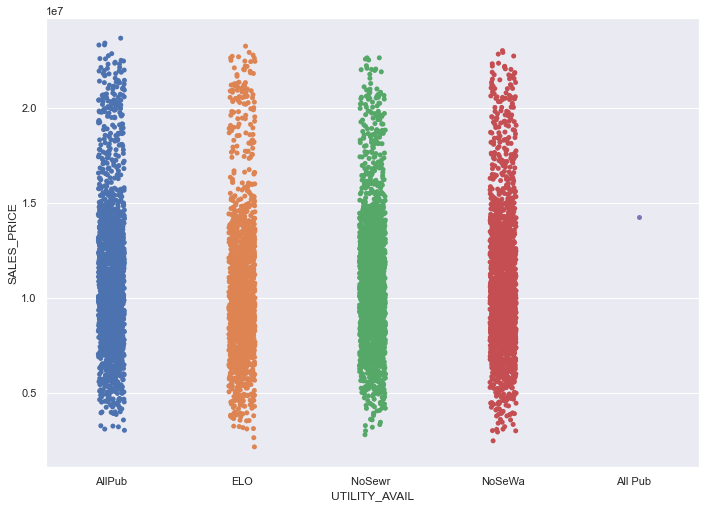

In [21]:
sbn.set(rc={'figure.figsize':(11.7,8.27)})
sbn.stripplot(x=df['UTILITY_AVAIL'],y=df['SALES_PRICE'])

## UNIVARIATE SUMMARY ANALYSIS

### Histograms

Text(0.5, 0, 'Sales')

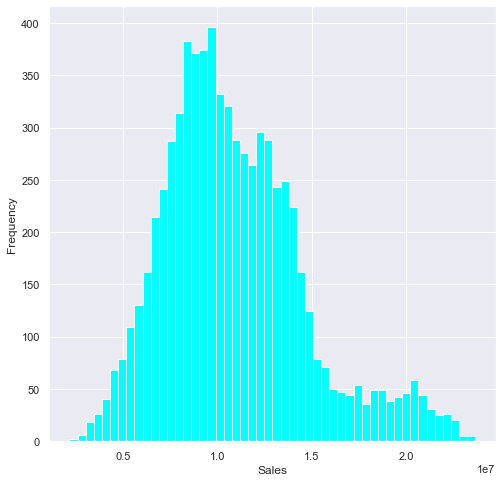

In [22]:
## target variable 

plt.figure(figsize=(8,8))
df['SALES_PRICE'].plot.hist(color="cyan",bins = 50)
plt.xlabel('Sales', fontsize=12)


- The distribution of the target variable is slightly right skewed. 
- We can see a small number of houses with a very high price. 

Text(0.5, 0, 'Sales')

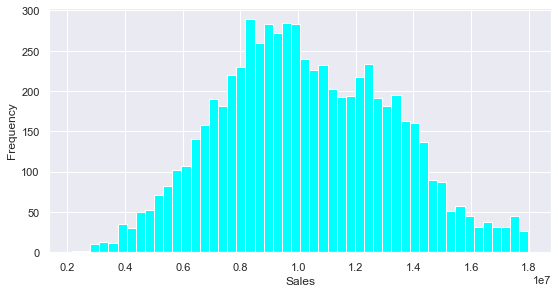

In [23]:
plt.figure(figsize=(9,4.5))
(df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot.hist(color="cyan", bins=50)
plt.xlabel('Sales', fontsize=12)

Text(0.5, 0, 'Area in sq feet')

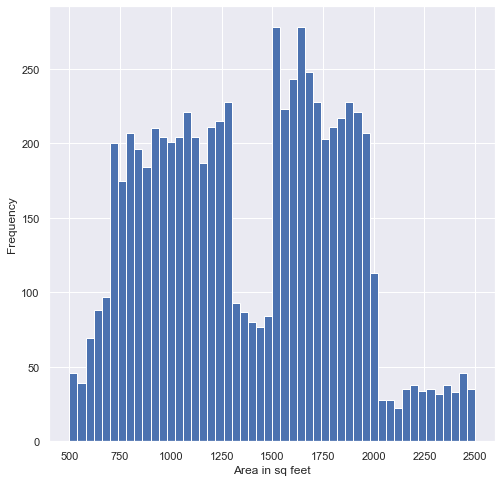

In [24]:
## Area of house in Square feet

plt.figure(figsize=(8,8))
df['INT_SQFT'].plot.hist(bins = 50)
plt.xlabel('Area in sq feet', fontsize=12)

- Most houses have the area between **750 sq feet to 1250 sq feet** or around **1500 sq feet to 2000 sq feet**
- Very less number of houses have area more than 2000 sq feet or less than 750 sq feet

Text(0.5, 0, 'Commision in lakhs')

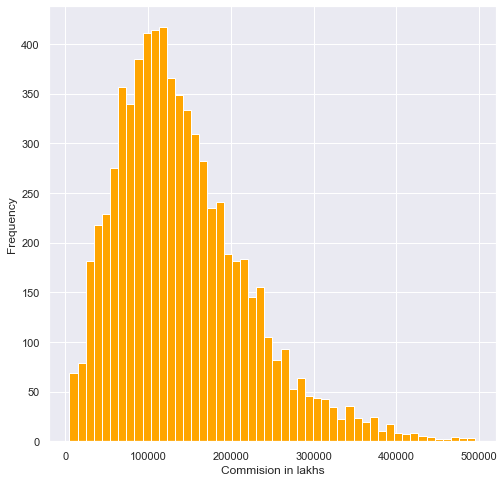

In [25]:
## Commision paid to the agent

plt.figure(figsize=(8,8))
df['COMMIS'].plot.hist(color = "orange", bins=50)
plt.xlabel('Commision in lakhs',fontsize=12)

- An agent is mostly paid somewhere from **50,000 to 2,00,000 INR**.
- It is very unlikely that the agent would get paid more than **2,50,000 INR**.
- It is a 'right-skewed' histogram.

Text(0.5, 0, 'Distance in meter')

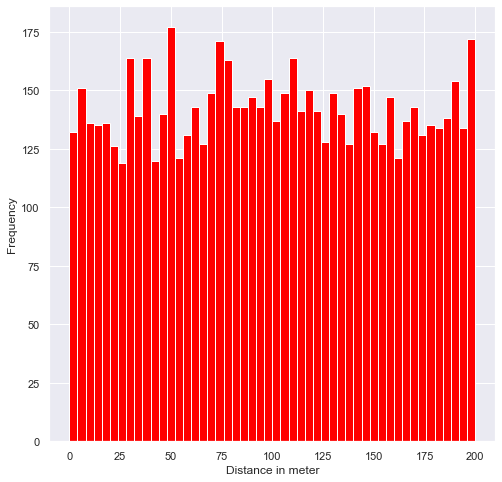

In [26]:
## The distance of the property to the main road

plt.figure(figsize=(8,8))
df['DIST_MAINROAD'].plot.hist(color="red",bins=50)
plt.xlabel('Distance in meter',fontsize=12)

- This histogram shows that house are located in different location as their is no perfect curve to conclude anything. 

Text(0.5, 0, 'Overall Quality Score')

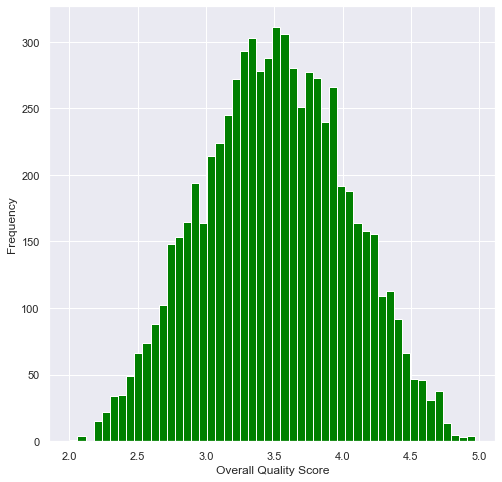

In [27]:
## The overall quality score histogram

plt.figure(figsize=(8,8))
df['QS_OVERALL'].plot.hist(bins=50,color="green")
plt.xlabel('Overall Quality Score',fontsize=12)

- The histogram displays a perfect curve for the overall quality score of the property.

### Bar Plots

<AxesSubplot:>

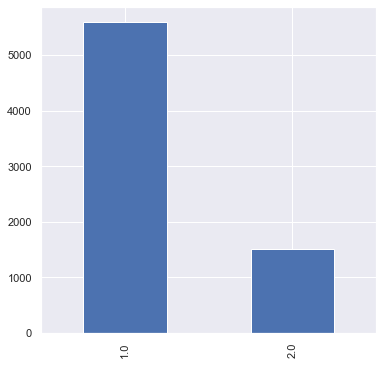

In [28]:
plt.figure(figsize=(6,6))
df['N_BATHROOM'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

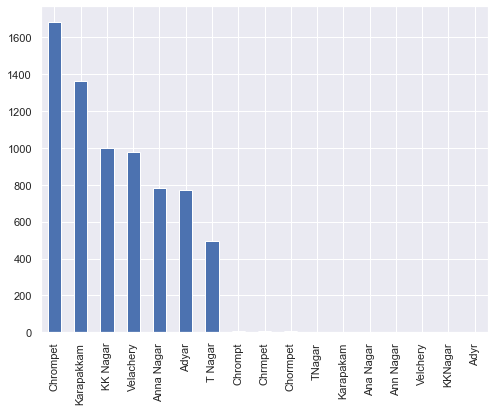

In [29]:
plt.figure(figsize=(8,6))
df['AREA'].value_counts().plot(kind = 'bar')

- There are 17 different categories in the 'AREA' variable
- Only 7 unique area name
- maximum houses are in the area Chrompet, followed by Karapakkam

<AxesSubplot:>

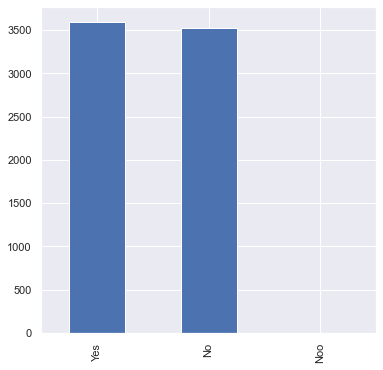

In [30]:
# houses with parking facility

plt.figure(figsize=(6,6))
df['PARK_FACIL'].value_counts().plot(kind = 'bar')


## Conclusion of the univariate analysis

In this module of building a machine learning model we've came so far and encountered the following corrections to be made in the dataset to make it outlier free. 

The outliers on which the data has to be manipulated are:
- Drop duplicates (if any).
- Fill the missing values.
    -  Either drop the tulpes/rows if dataset is large and will not have a negative impact.  
    - Take the mean or median to compute the missing values in case of continuous variable.
    - Take the mode to compute the missing values in case of categorical variable.
    - Using other independent variables the missing values can be computed.
- Correct the datatypes.
- Fix the spelling errors in continuous or categorical variables.
        

# *********************** DATA MANIPULATION *******************************

The outliers on which the data has to be manipulated are:
- Drop duplicates (if any).
- Fill the missing values.
    -  Either drop the tulpes/rows if dataset is large and will not have a negative impact.  
    - Take the mean or median to compute the missing values in case of continuous variable.
    - Take the mode to compute the missing values in case of categorical variable.
    - Using other independent variables the missing values can be computed.
- Correct the datatypes.
- Fix the spelling errors in continuous or categorical variables.

### Summary of the missing vaules

In [31]:
# missing values present the dataset as per the variables

df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

- The N_BEDROOM variable has 1 missing value.
- The N_BATHROOM variable has 5 missing values.
- The QS_OVERALL variable has 48 missing values.

### Drop duplicates (if any).

In [32]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


Basically, what drop_duplicates() is doing is, if there are two rows exactly identical then second identical row is been removed form the dataset. 

In [33]:
df.shape

(7109, 19)

As their are no rows in the dataset that are identical so the shape of the dataset remains intact.

### Different ways deal with the missing values

- Remove the rows with missing values
- Mean or median in case of continuous variable
- With mode in case of categorical variable
- Using other independent variables

### Remove the rows with missing values

In [34]:
# keeping the axis 0 will remove the duplicate rows from the dataset

df.dropna(axis=0, how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


- To make changes to original data, use inplace=True
- In this case, 54 rows removed

In [35]:
# keeping the axis 1 will remove the columns with duplicate values

df.dropna(axis=1, how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,144400,7600000
1,P09411,Anna Nagar,1986,26,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,304049,21717770
2,P01812,Adyar,909,70,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,92114,13159200
3,P05346,Velachery,1855,14,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,77042,9630290
4,P06210,Karapakkam,1226,84,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,107060,5353000
7105,P10000,Velachery,1897,52,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,205551,10818480
7106,P09594,Velachery,1614,152,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,167028,8351410
7107,P06508,Karapakkam,787,40,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,119098,8507000


- When axis is set to 1, columns are dropped.
- For given data, 3 columns has missing values hence three columns dropped
- To avoid loss of data, we can use other ways of imputation

### Mean / Median for Continuous variables and Mode for the Categorical variables

#### N_BEDROOM (Categorical Variables)

In [36]:
df['N_BEDROOM'].dtype

dtype('float64')

'**O**' : refers to the **Object** type i.e Categorical variable

In [37]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [38]:
df['N_BEDROOM'].fillna(value = (df['N_BEDROOM'].mode()[0]), inplace=True)

Filled the missing place in the dataset for the variable N_BEDROOM and made changes to the dataset too.

In [39]:
df.loc[df['N_BEDROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE


Right now for the variable N_BEDROOM we have imputed the mode value in missing places so the output for the .isnull() is going to be a empty dataset.

#### N_BATHROOM (Categorical Variables)

In [40]:
df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [41]:
for i in range(0, len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if (df['N_BEDROOM'][i] == 1.0):
            df['N_BATHROOM'][i] = 1.0
        else: 
            df['N_BATHROOM'][i] = 2.0

<ipython-input-41-f2d96596fdec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['N_BATHROOM'][i] = 1.0
<ipython-input-41-f2d96596fdec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['N_BATHROOM'][i] = 2.0


- A for loop is being runned over the dataset locating the null / NaN values in the N_BATHROOM variable and based on the value in the N_BEDROOM the value for the  N_BATHROOM is computed.

#### QS_OVERALL (Continuous Variable)

In [42]:
df['QS_OVERALL'].dtype

dtype('float64')

In [43]:
df[[ 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [44]:
temp = (df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM'])/3
temp.name = 'Average'
pd.concat([df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_BEDROOM'], temp], axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,Average
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


- Imputing missing values with the help of other 'quality score' columns
- Additionally we can assign higher weights to n_bedroom and lower to n_bathroom

In [45]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(48, 19)

In [46]:
def fill_na(x):
    return ((x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3)

In [47]:
df['QS_OVERALL'] =  df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis=1)

There's a lambda function applied on the QS_OVERALL variable, and called when the null value is encountered.


In [48]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

### Change the datatypes of certain variables

In [49]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [50]:
# data type of n_bedroom, n_room, n_bathroom

df = df.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})

astypes is used to change the datatype of variable.

### Replace categories

In [51]:
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('************ Value Count in', i, '************')
    print(df[i].value_counts())
    print('')

************ Value Count in AREA ************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

************ Value Count in N_BEDROOM ************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

************ Value Count in N_BATHROOM ************
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

************ Value Count in N_ROOM ************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

************ Value Count in SALE_COND ************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE

### Update names in columns
- AREA
- SALE_COND
- PARK_FACIL
- BUILDTYPE
- UTILITY_AVAIL
- STREET

In [52]:
df['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [53]:
df['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'}, inplace = True)

In [54]:
df['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [55]:
df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [56]:
df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)


In [57]:
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [58]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [59]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [60]:
df.shape


(7109, 19)

In [61]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [62]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub', 'NoSeWa':'NoSewa'},inplace = True)

In [63]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSewa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [64]:
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [65]:
df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)

# BIVARIATE ANALYSIS

  
## House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


In [66]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

## Hypothesis -
 - Sales price should increase with increase in interior square feet
 - The sales price would depend on the area where house is located
 - Higher the number of rooms, bathrooms in the house, more should be the price 

  
## 1. House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
   - BUILDTYPE – The type of building

**1. Interior area and sales price (target)**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

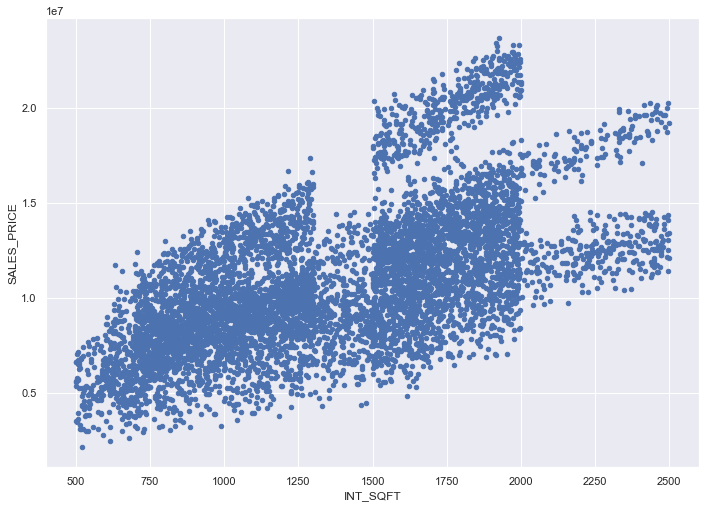

In [67]:
# interior area and sales price (target)

df.plot.scatter('INT_SQFT','SALES_PRICE')

- A very clear linear relationship can be seen between the interior area and sales price
- These variables have a positive correlation

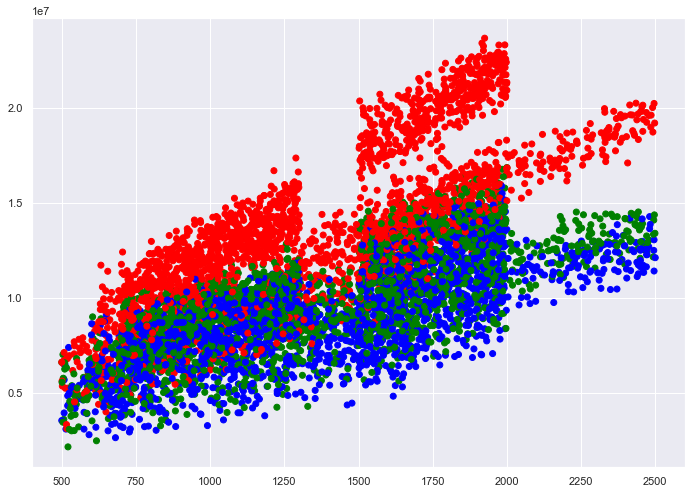

In [68]:
fig, ax = plt.subplots()
colors = {'Commercial':'red', 'House':'blue', 'Others':'green'}
ax.scatter(df['INT_SQFT'], df['SALES_PRICE'], c=df['BUILDTYPE'].apply(lambda x: colors[x]))
plt.show()

In [69]:
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

** 2. Sales Price against no of bedroom and bathroom**

In [70]:
# sale price of houses wrt number of bedrooms and bathroomms 
df.pivot_table(values='SALES_PRICE', index='N_BEDROOM', columns='N_BATHROOM', aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


**3. QS_OVERALL and sales price **

<AxesSubplot:xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

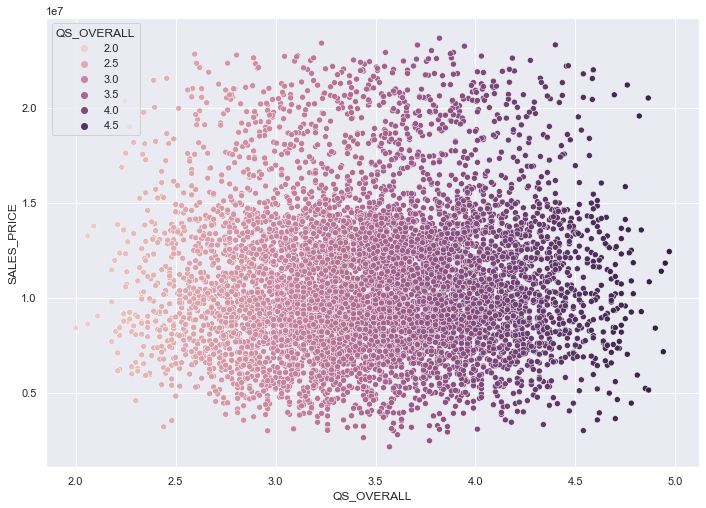

In [71]:
#QS_OVERALL and sales price

# df.plot.scatter('QS_OVERALL', 'SALES_PRICE')
sbn.scatterplot(x=df['QS_OVERALL'],y=df['SALES_PRICE'],hue=df['QS_OVERALL'])

Text(0.5, 1.0, 'QS_OVERALL')

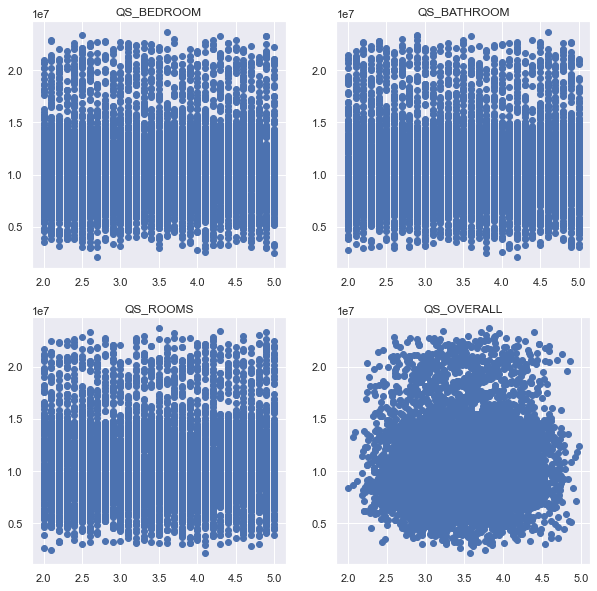

In [72]:
fig, axs = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0, 0].scatter(df['QS_BEDROOM'], df['SALES_PRICE'])    # QS_BEDROOM and sale price
axs[0, 0].set_title('QS_BEDROOM')

axs[0, 1].scatter(df['QS_BATHROOM'], df['SALES_PRICE'])   # QS_BATHROOM and price
axs[0, 1].set_title('QS_BATHROOM')

axs[1, 0].scatter(df['QS_ROOMS'], df['SALES_PRICE'])    # QS_ROOMS and sale price
axs[1, 0].set_title('QS_ROOMS')

axs[1, 1].scatter(df['QS_OVERALL'], df['SALES_PRICE'])    # QS_OVERALL and sale price
axs[1, 1].set_title('QS_OVERALL')



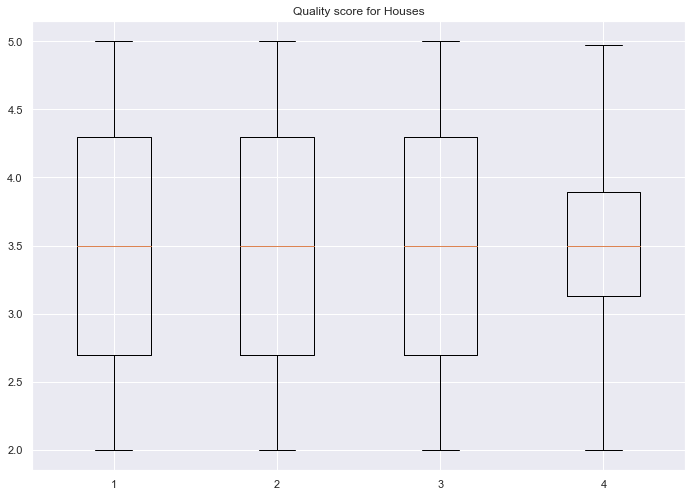

In [73]:
# Create an axes instance
ax = plt.figure().add_subplot(111)
ax.set_title('Quality score for Houses')

# Create the boxplot
bp = ax.boxplot([df['QS_BEDROOM'], df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_OVERALL']])


- Distribution of number of houses in each quartile is same for 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM'
- For QS_OVERALL, 50 % of values lie in a very small range of ~3.2 to 3.7 score

** 4. Building type and sales price**

In [74]:
# SALE PRICE based on building type

df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

- Houses built for commercial purposes have a considerably higher sale price
- Houses with additional facility should have higher price

<AxesSubplot:ylabel='Frequency'>

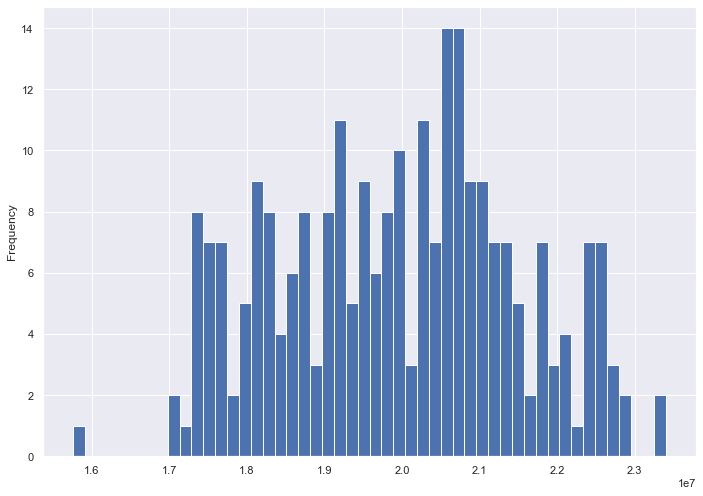

In [75]:
temp_df = df.loc[(df['BUILDTYPE']=='Commercial')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

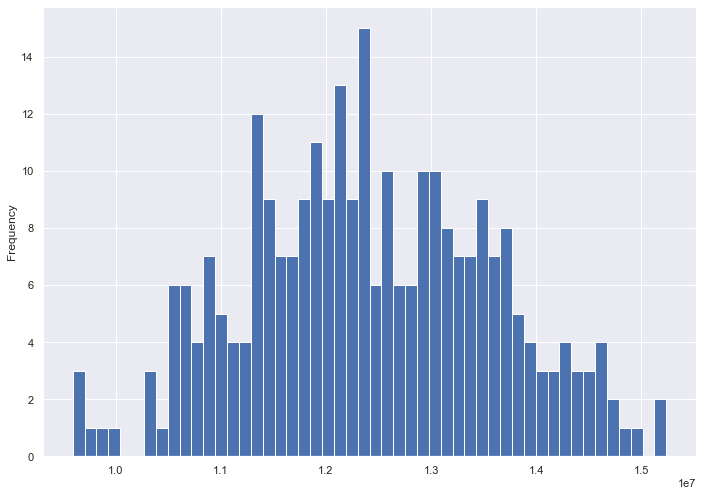

In [76]:
temp_df = df.loc[(df['BUILDTYPE']=='House')&(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
   - STREET
   - MZZONE  

**5. Building type and parking facility**

In [77]:
# building type and parking facility

df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

- For all three categories, houses with park facility have a higher price
- we can use groupby function to generate a plot for better comparison

<AxesSubplot:xlabel='BUILDTYPE,PARK_FACIL'>

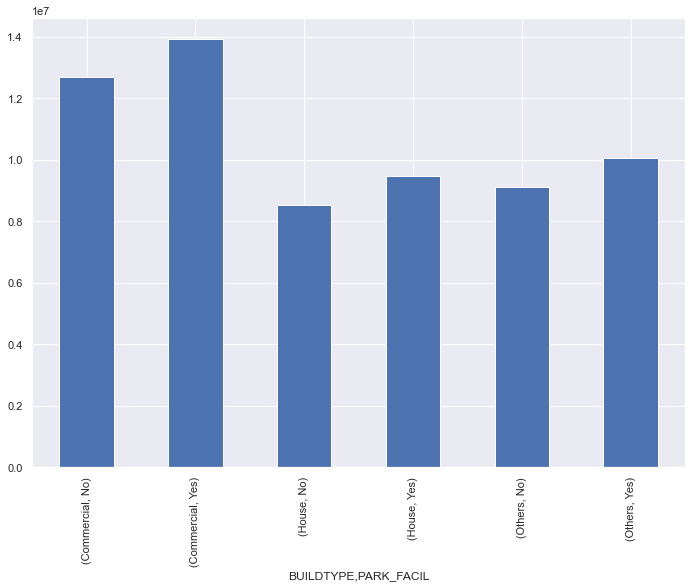

In [78]:
temp = df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind = 'bar', stacked = True)

**6. Area-wise price for houses**

In [79]:
# average price for each area category

df.pivot_table(values='SALES_PRICE', index='AREA', aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


- Anna Nagar and T Nagar are comparatively more expensive
- The least priced are among the 7 is karapakkam

<AxesSubplot:ylabel='Frequency'>

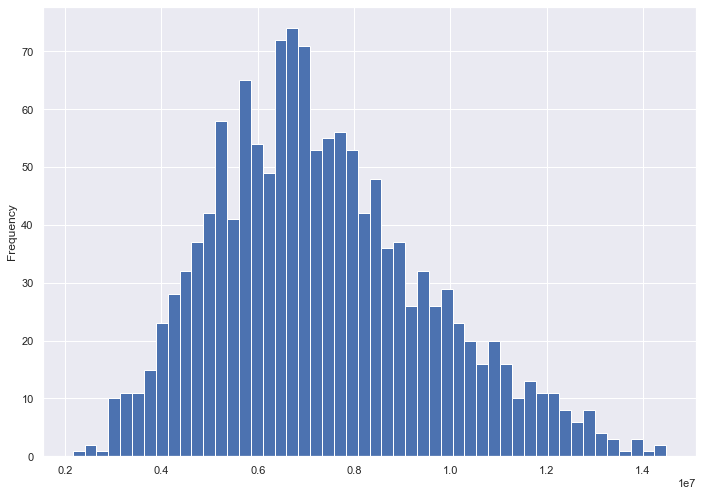

In [80]:
temp_df = df.loc[(df['AREA']=='Karapakkam')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

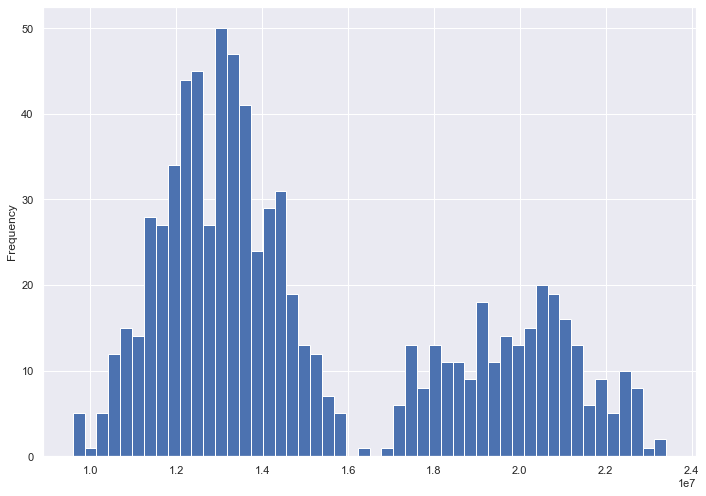

In [81]:
temp_df = df.loc[(df['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

**7. Distance from main road **

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

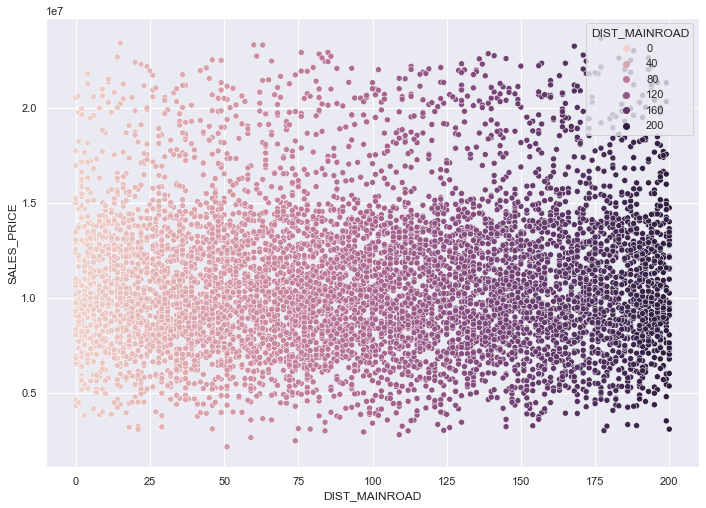

In [82]:
# df.plot.scatter('DIST_MAINROAD', 'SALES_PRICE')
sbn.scatterplot(x=df['DIST_MAINROAD'],y=df['SALES_PRICE'],hue=df['DIST_MAINROAD'])

**8. Type of street around the house**

In [83]:
df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9406050
Paved        10470070
Name: SALES_PRICE, dtype: int64

- Both gravel and paved roads have approximately same sale price
- Houses marked with 'no access' have a lower sale price

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


<AxesSubplot:xlabel='SALES_PRICE', ylabel='COMMIS'>

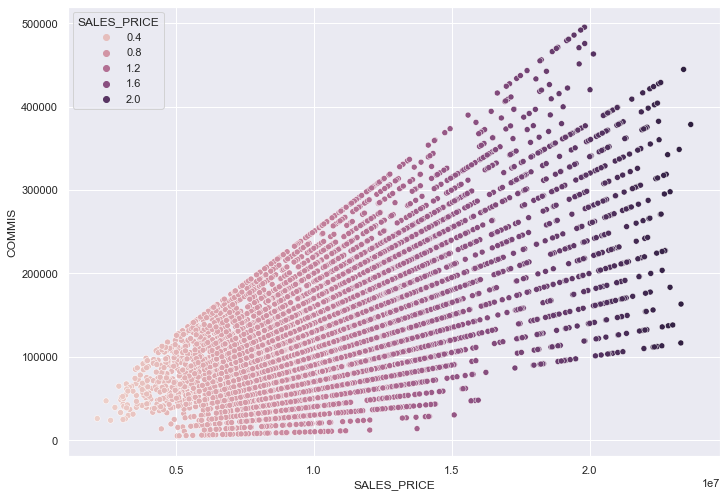

In [84]:
# commission and sales price

# df.plot.scatter('SALES_PRICE', 'COMMIS')
sbn.scatterplot(x=df['SALES_PRICE'],y=df['COMMIS'],hue=df['SALES_PRICE'])

In [85]:
df[['SALES_PRICE', 'COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


## Feature Engineering

In [86]:
new_df = df.copy()
new_df['Price_per_sqft'] = new_df['SALES_PRICE']/new_df['INT_SQFT']

In [87]:
new_df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE', 'Price_per_sqft'],
      dtype='object')

In [88]:
new_df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,Price_per_sqft
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000,7569.721116
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770,10935.433031
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200,14476.567657
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290,5191.530997
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250,6040.986949


In [89]:
new_df[new_df['INT_SQFT']/new_df['N_ROOM']<300].head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,Price_per_sqft
31,P02696,Adyar,868,15,1,1,3,Normal Sale,No,Others,NoSewa,Gravel,RL,2.3,2.1,2.0,2.11,72336,9042050,10417.108295
38,P02247,Chrompet,856,36,1,1,3,AdjLand,Yes,Others,NoSewr,Gravel,RM,2.1,3.6,3.5,3.12,103834,10383420,12130.163551
43,P05298,Karapakkam,507,49,1,1,2,AbNormal,Yes,House,ELO,Gravel,RH,2.6,4.6,4.6,4.00,74464,5728000,11297.830375
55,P01934,Karapakkam,545,154,1,1,2,Partial,No,Others,ELO,No Access,RH,3.1,2.2,3.4,2.95,88651,3854375,7072.247706
73,P02813,Adyar,890,116,1,1,3,AbNormal,Yes,House,NoSewr,Paved,C,2.5,4.7,5.0,4.19,43124,7187350,8075.674157


In [90]:
new_df['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [91]:
new_df['SALES_PRICE'].describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [92]:
dummies = pd.get_dummies(new_df['AREA'])


In [93]:
final_df = pd.concat([new_df,dummies], axis='columns')

In [94]:
final_df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,COMMIS,SALES_PRICE,Price_per_sqft,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,P03210,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,...,144400,7600000,7569.721116,0,0,0,0,1,0,0
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,...,304049,21717770,10935.433031,0,1,0,0,0,0,0
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,...,92114,13159200,14476.567657,1,0,0,0,0,0,0
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,...,77042,9630290,5191.530997,0,0,0,0,0,0,1
4,P06210,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,...,74063,7406250,6040.986949,0,0,0,0,1,0,0


# MACHINE LEARNING MODEL TRAINING

In [140]:
from sklearn.model_selection import train_test_split
X = final_df.drop(['SALES_PRICE','PRT_ID', 'AREA','SALE_COND','PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL','STREET', 'MZZONE',],axis=1).values   # independant features
y = final_df['SALES_PRICE'].values                 # dependant variable
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=10)

In [141]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)*100,"%"

(94.40574063175492, '%')

**Model's prediction is 94% true, and that is a preety good score.**

In [144]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)*100,"%"

(array([94.18573257, 94.86732841, 94.51194307, 94.61245244, 94.29755798]), '%')

**Cross Validation Score also speaks for themselves, for every shuffled split it scored approximately 95%**